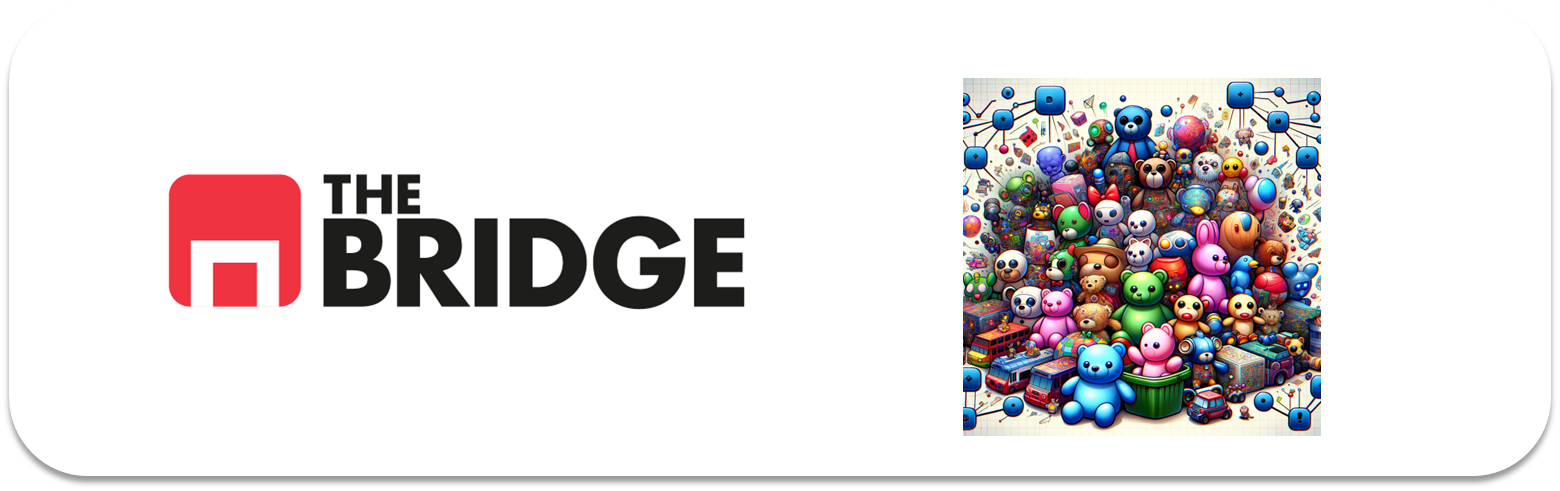

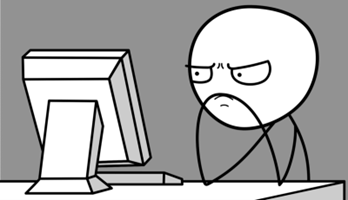

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [263]:
import pandas as pd
import numpy as np
import Toolbox_datascience as tds
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [264]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_13\\Unidad_02\\Ejercicios_Workout\\Toolbox_datascience.py'>

### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [265]:
df = pd.read_csv('./data/wholesale-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [266]:
tds.describe_df(df)

COL_N,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
DATA_TYPE,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,3,433,421,430,426,417,403
CARDIN (%),0.0,0.01,0.98,0.96,0.98,0.97,0.95,0.92


In [267]:
tds.clasifica_variables(df,20,0.05)

,nombre_variable,tipo_sugerido
0,Channel,Binaria
1,Region,Categórica
2,Fresh,Numérica Continua
3,Milk,Numérica Continua
4,Grocery,Numérica Continua
5,Frozen,Numérica Continua
6,Detergents_Paper,Numérica Continua
7,Delicassen,Numérica Continua


$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



In [268]:
cat_features = ['Channel', 'Region']
num_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] 

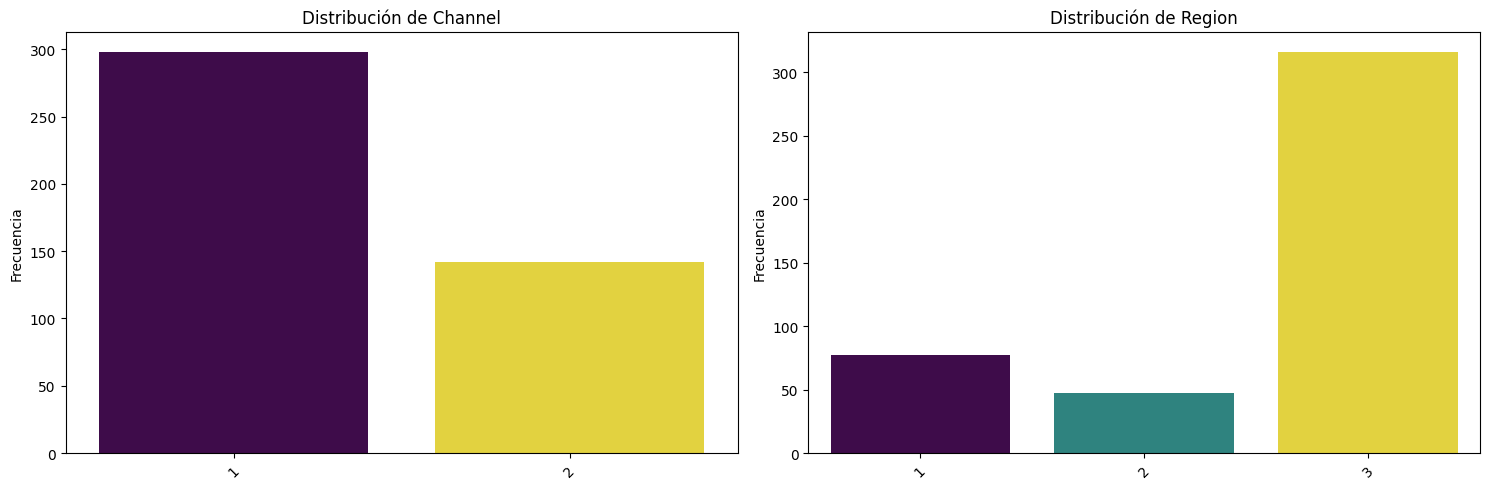

In [269]:
tds.pinta_distribucion_categoricas(df,cat_features)

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_13\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:422: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_13\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:422: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_13\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:422: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_13\Unidad_02\

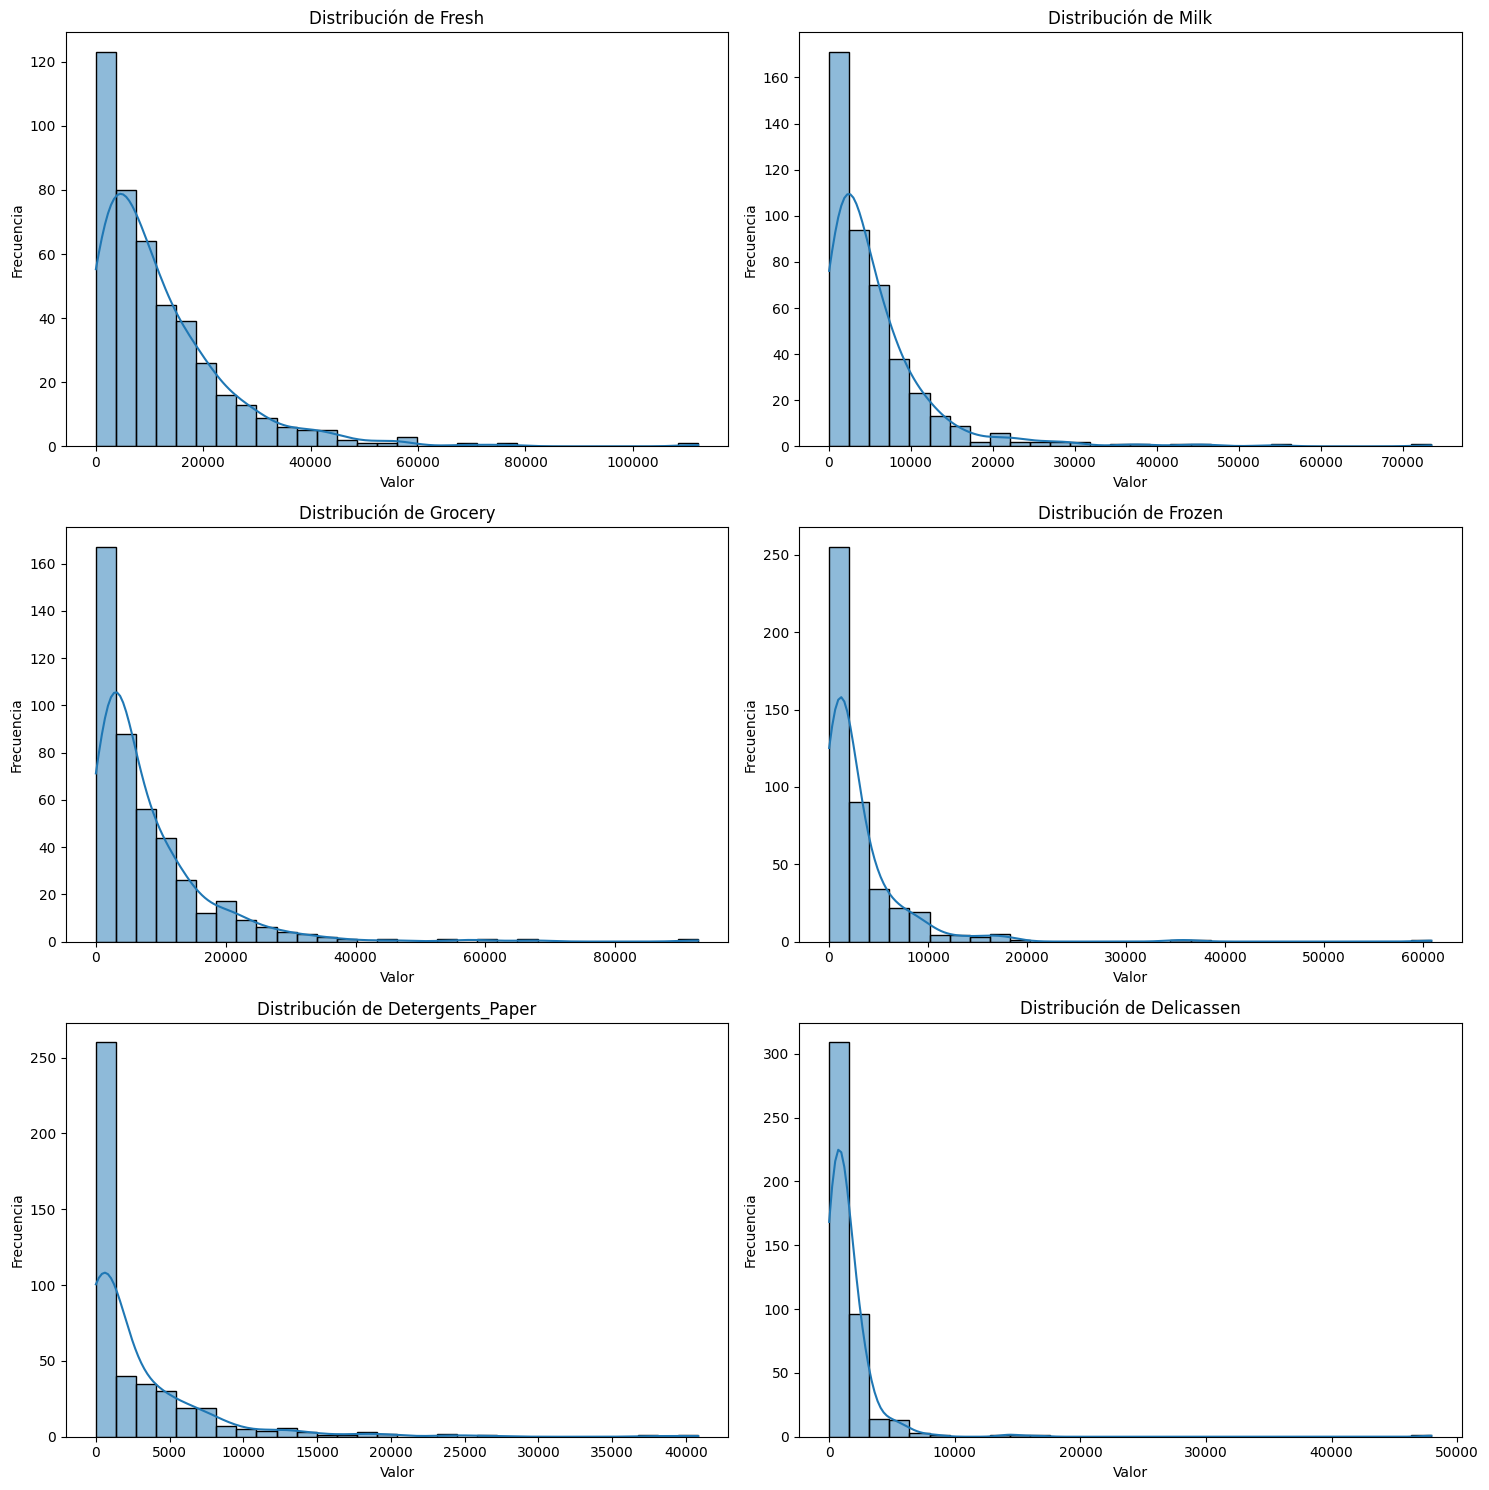

In [270]:
tds.pinta_distribucion_numericas(df, num_features)

Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

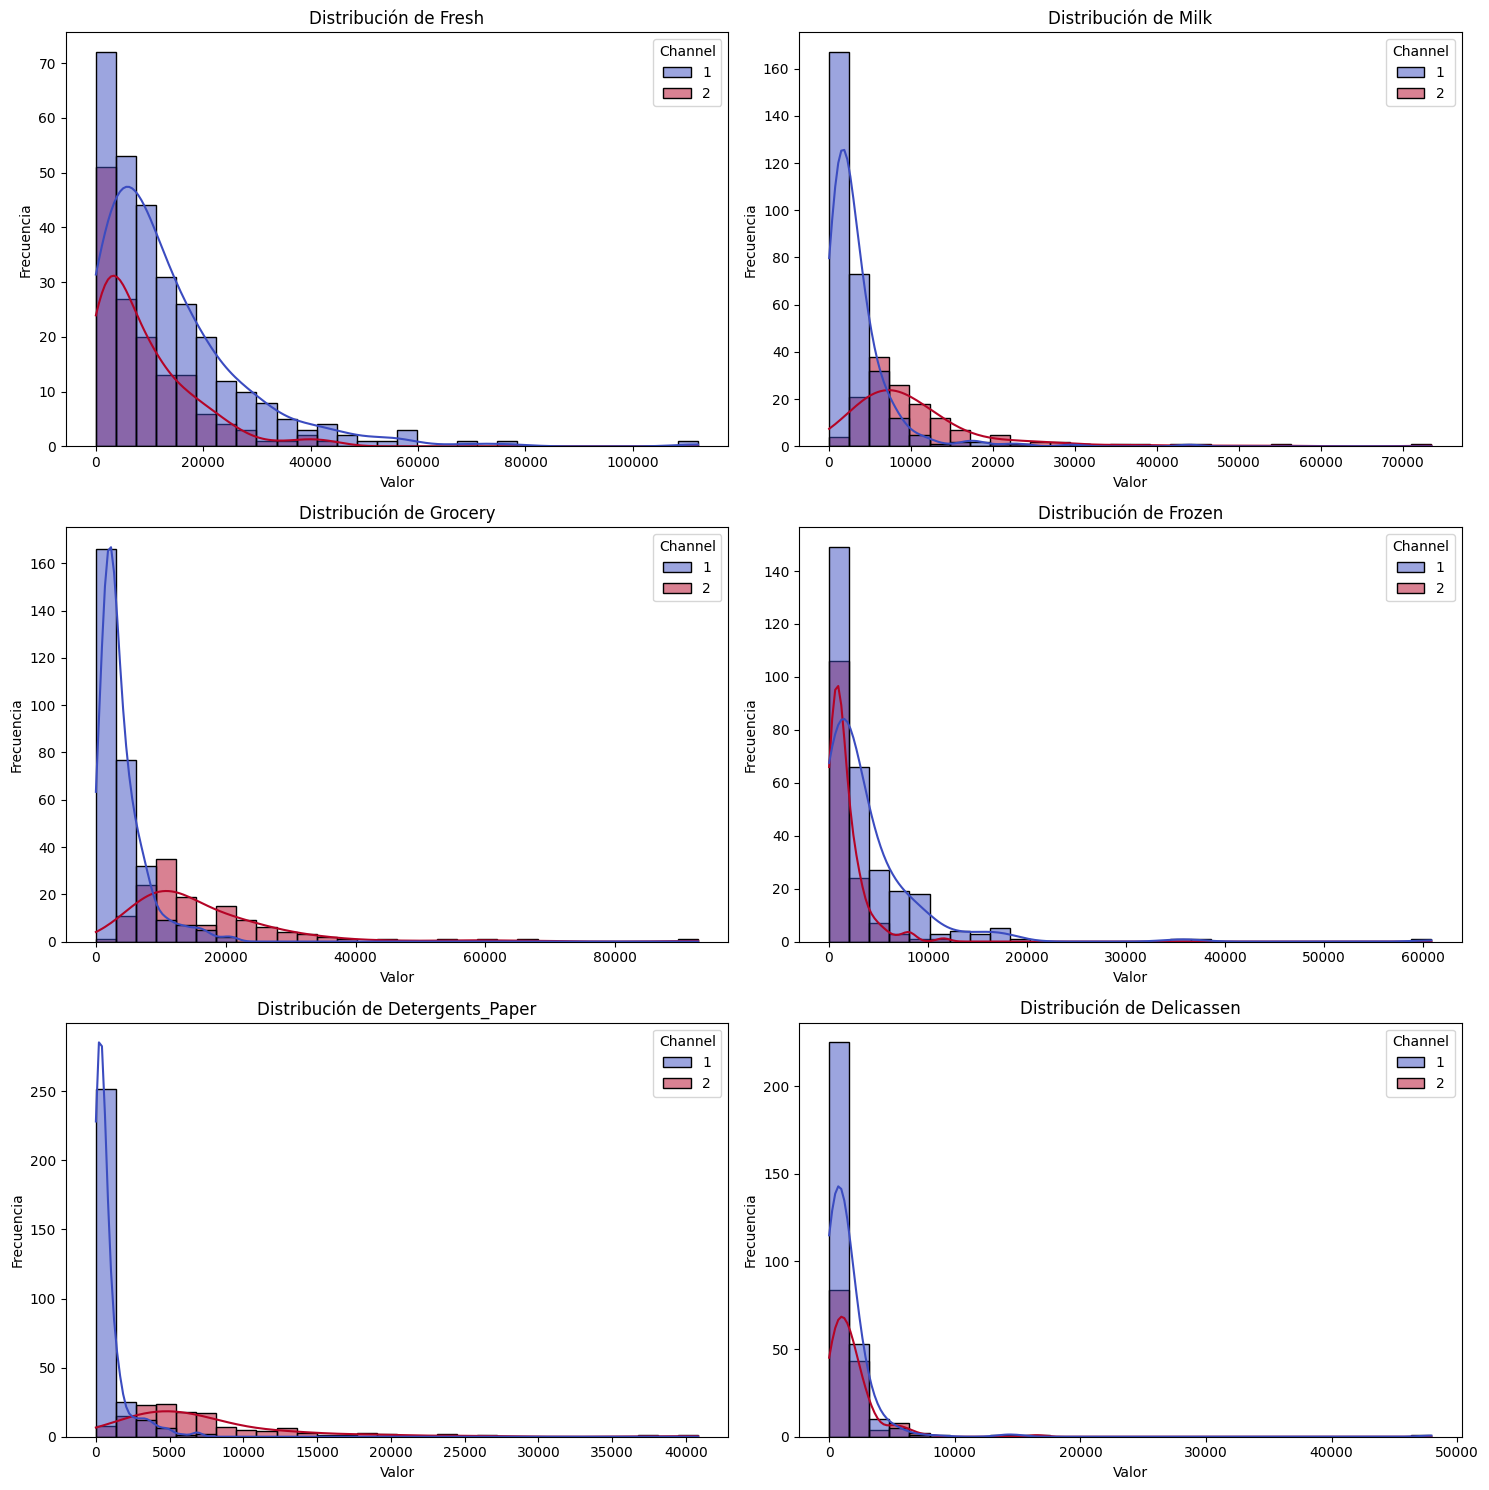

In [271]:
tds.pinta_distribucion_numericas(df, num_features,hue='Channel')

### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

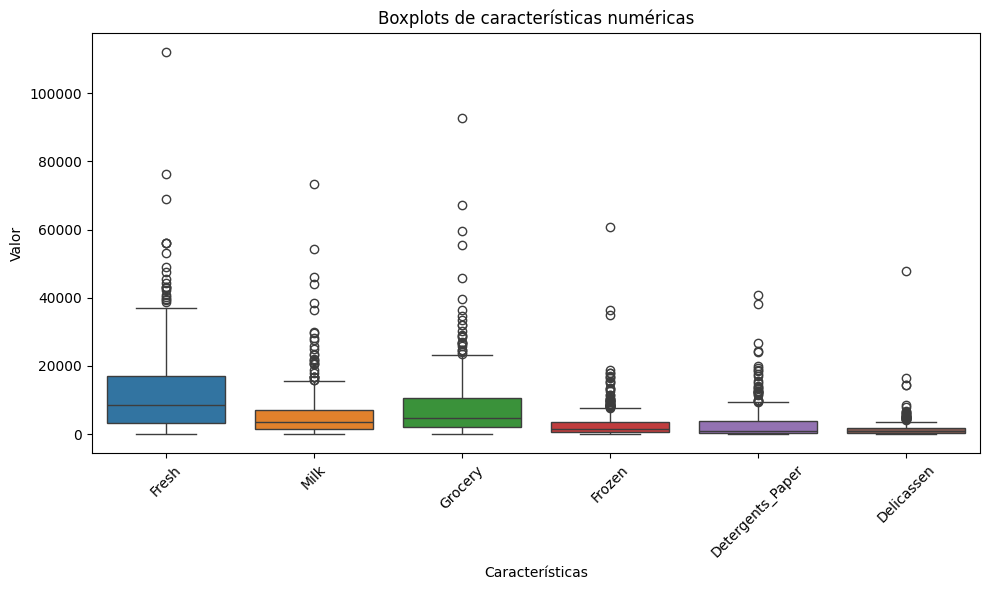

In [272]:
tds.plot_boxplots_by_category(df,num_features)

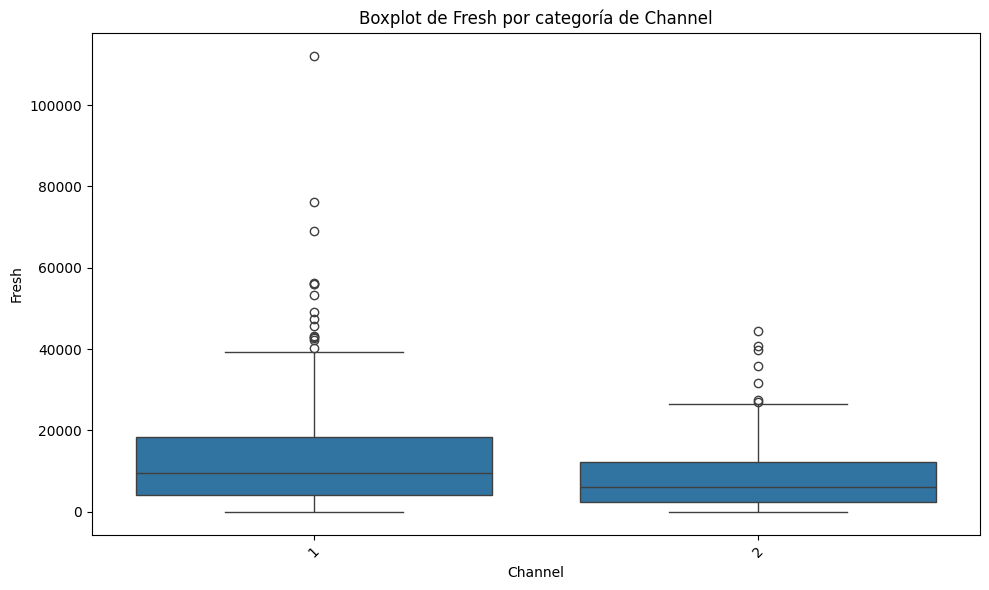

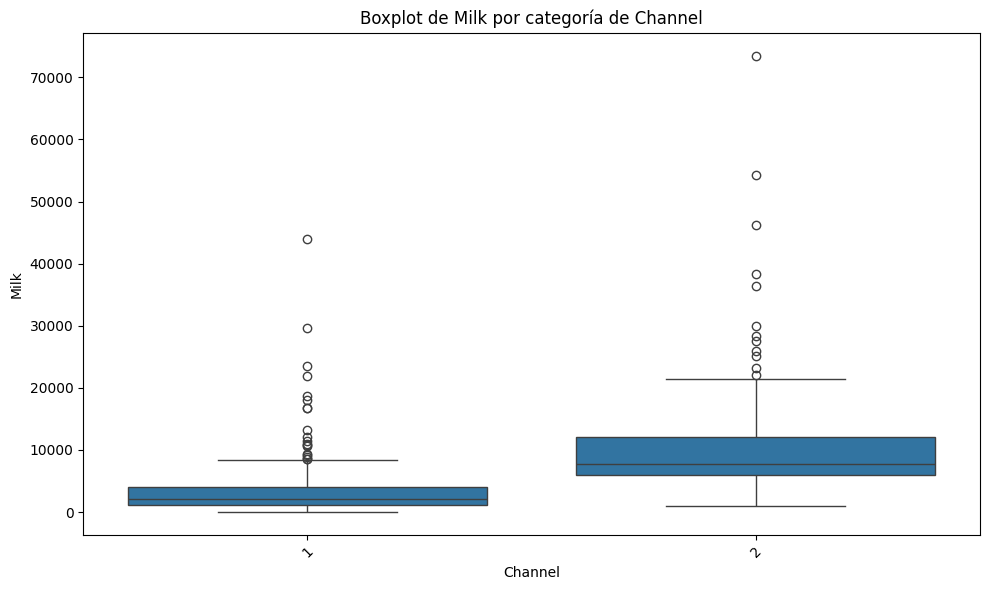

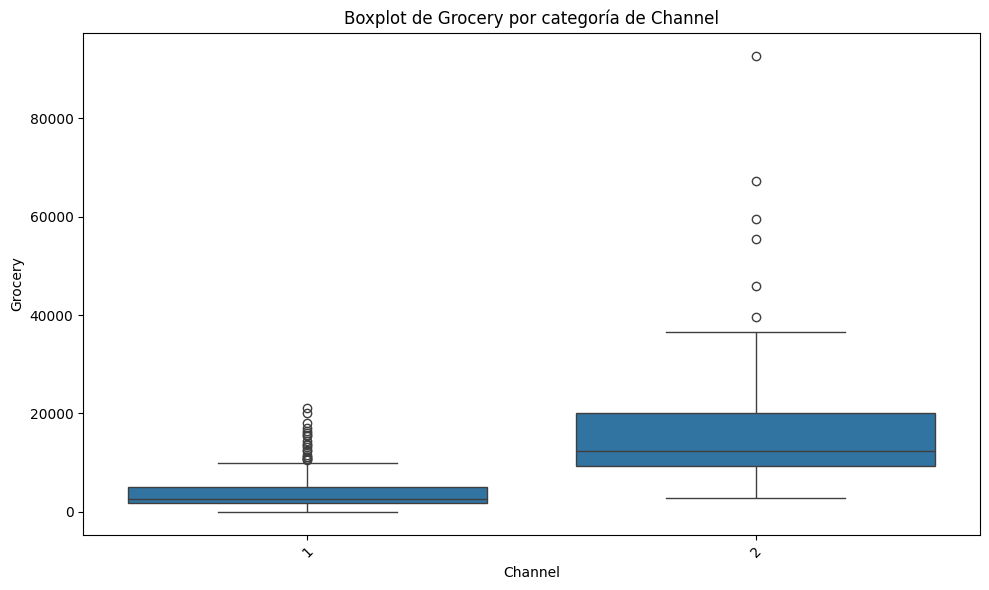

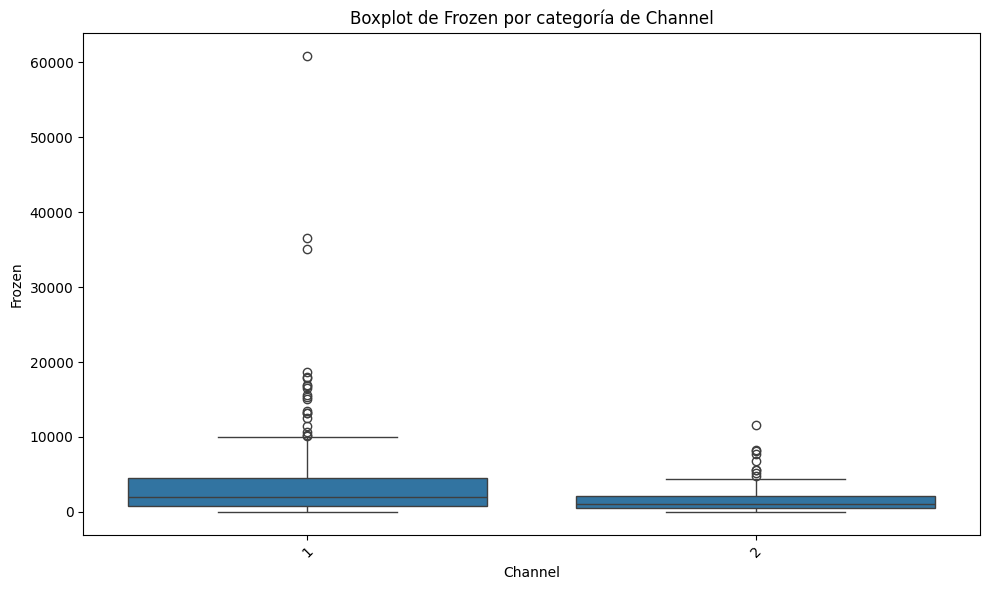

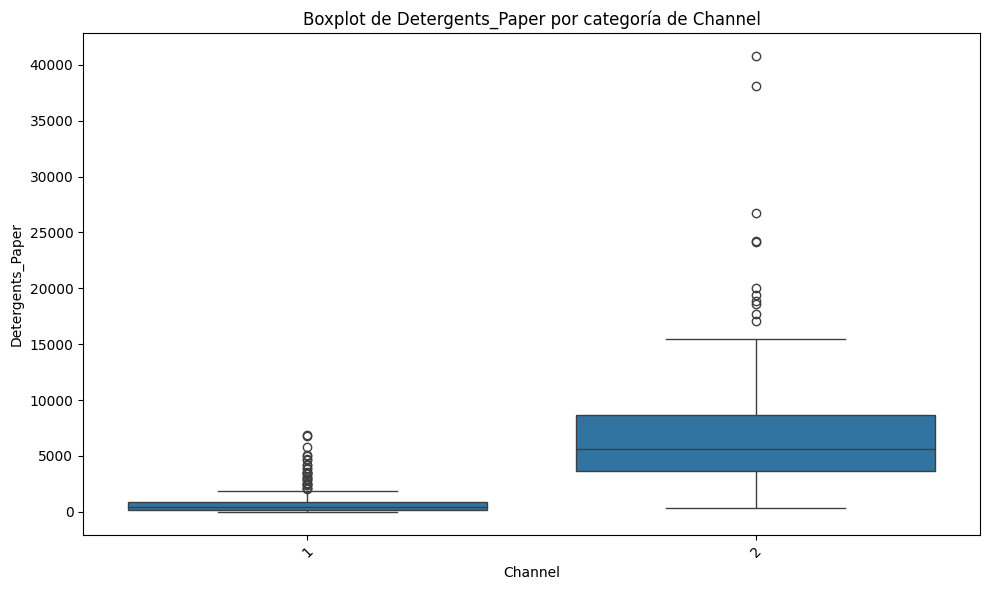

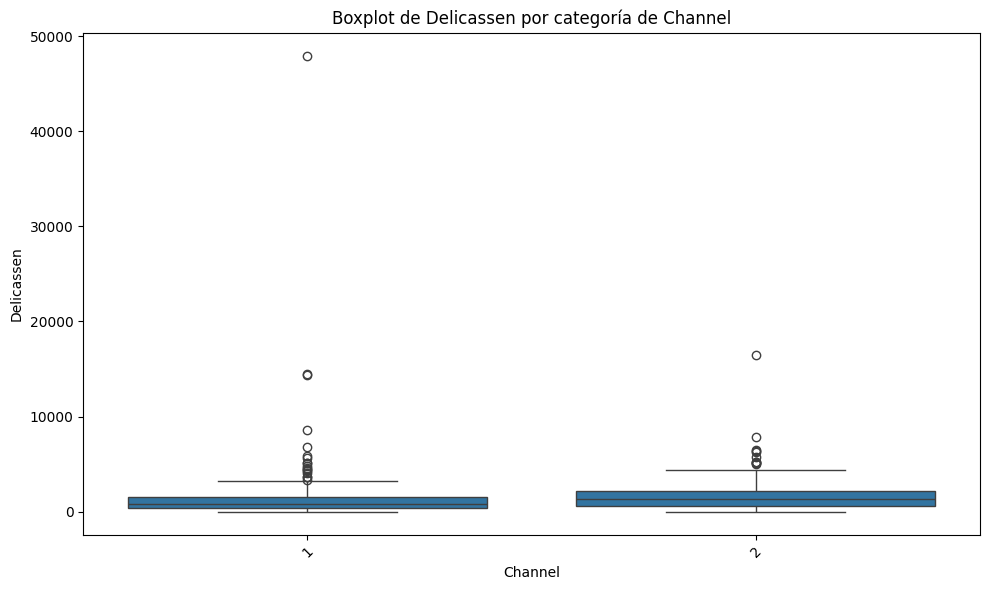

In [273]:
tds.plot_boxplots_by_category(df,num_features,cat_column='Channel')

### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

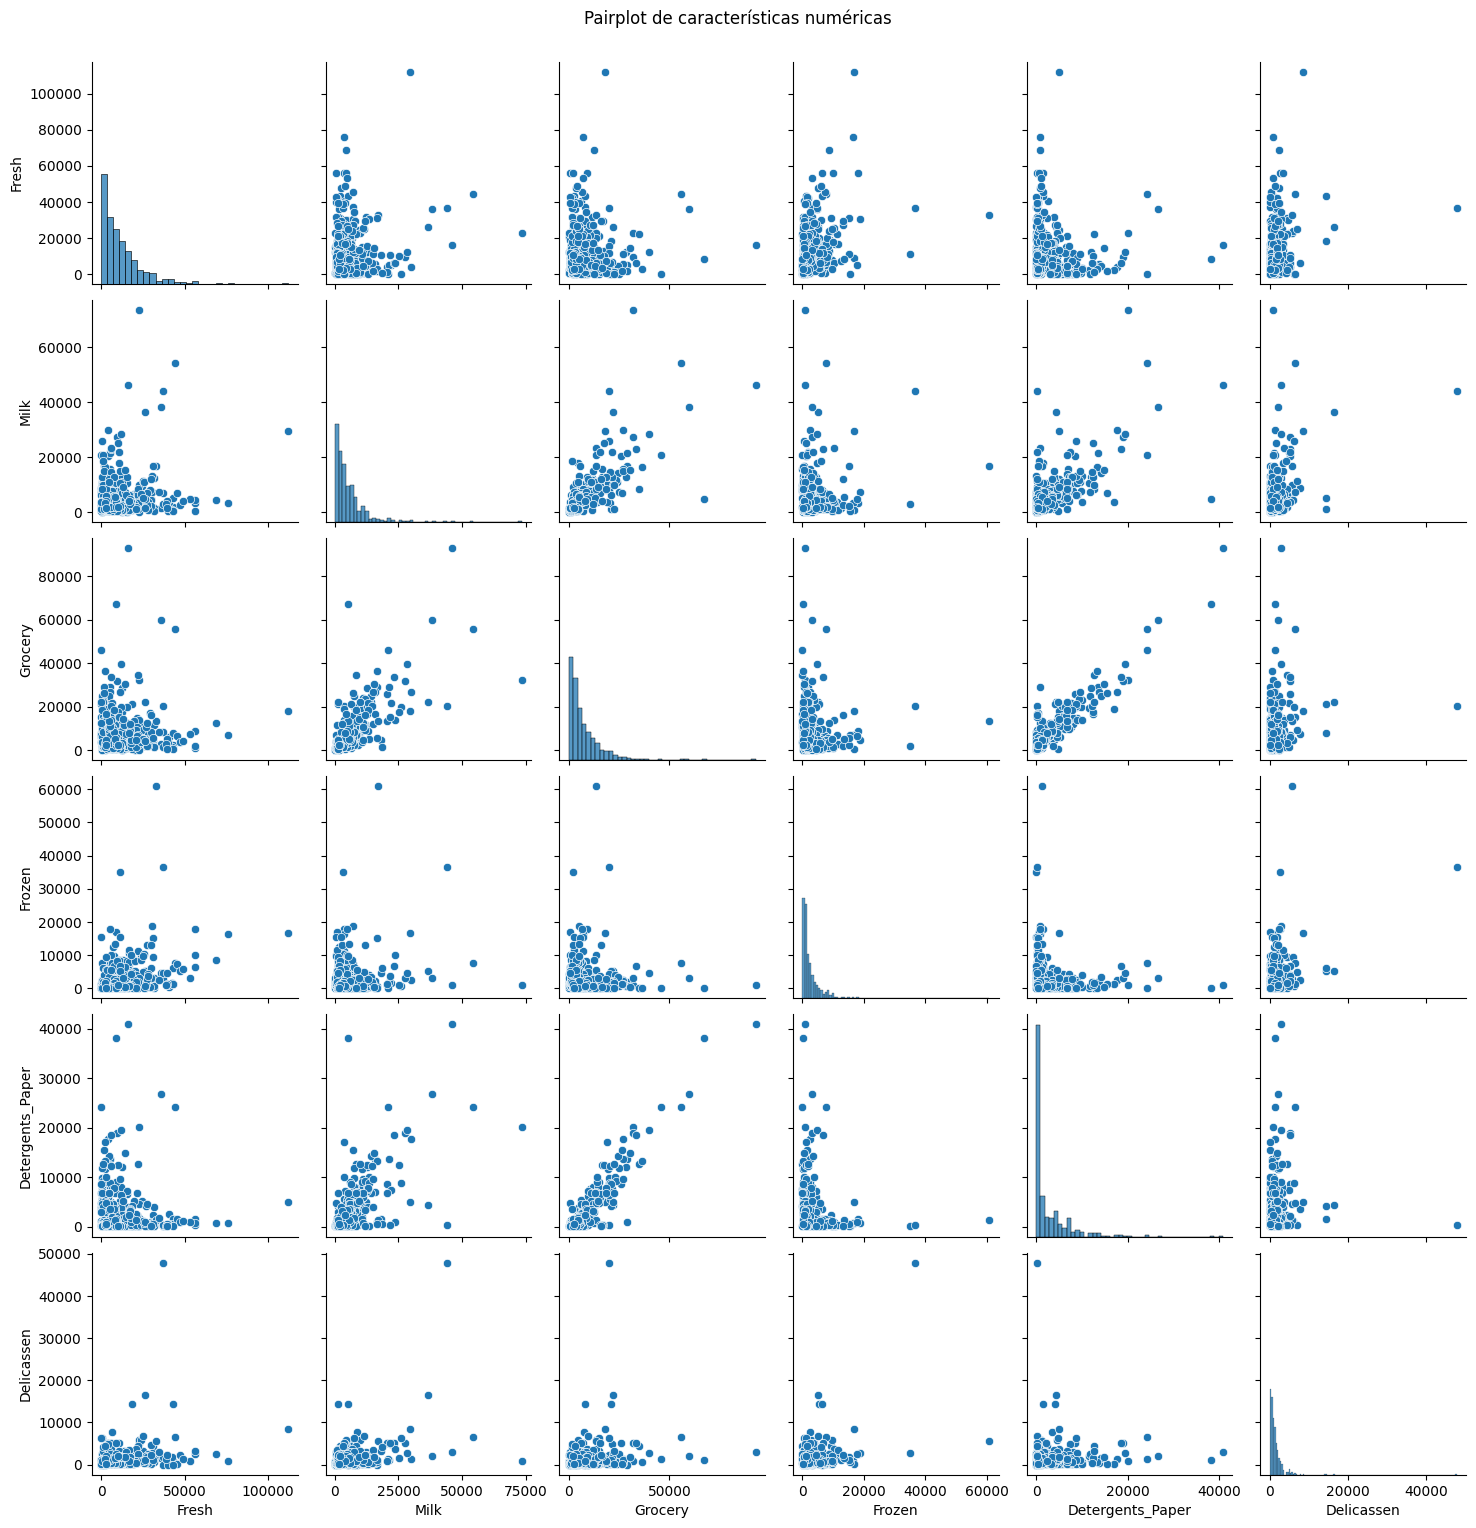

In [274]:
tds.plot_pairplots_by_category(df,num_features)

### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

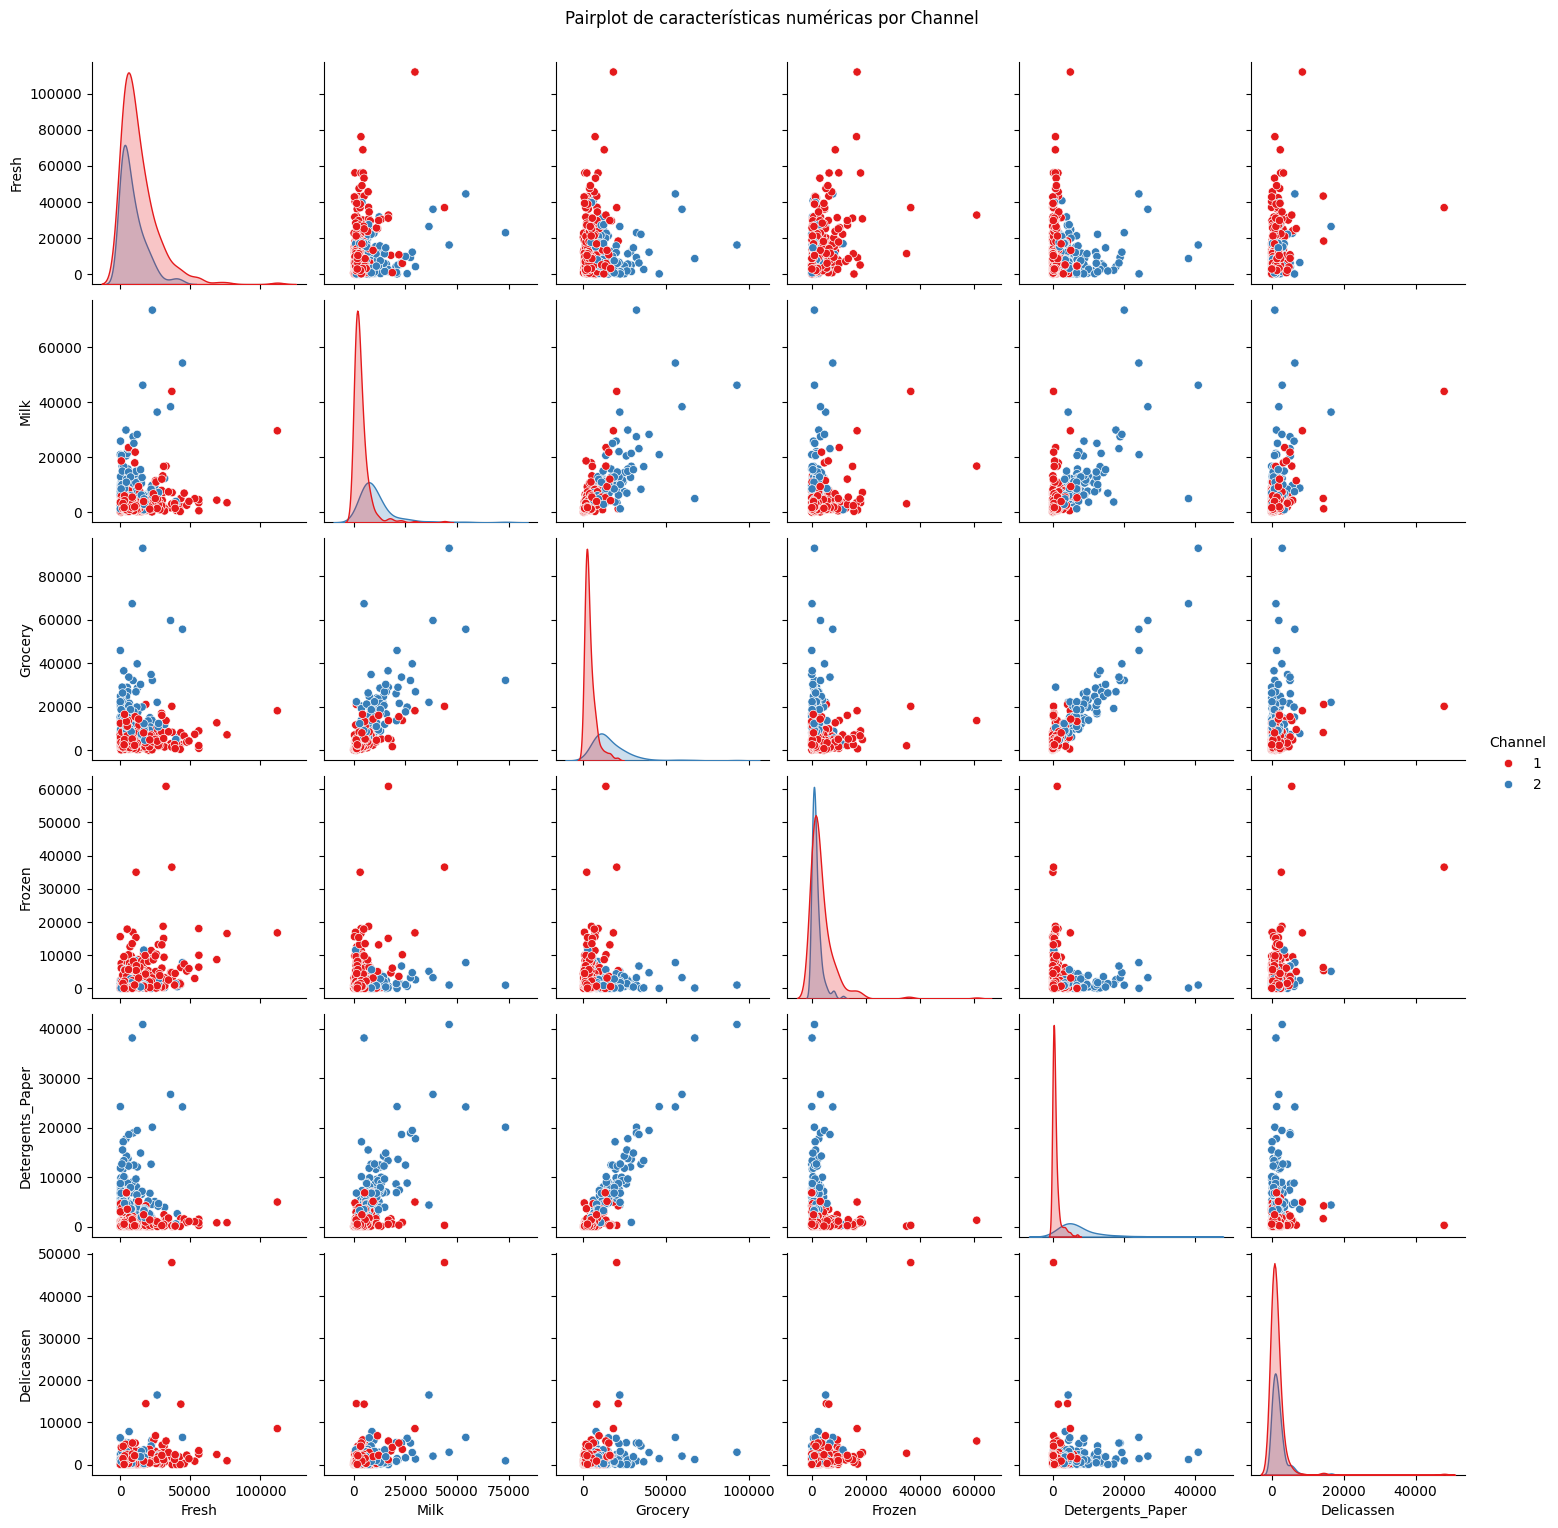

In [275]:
tds.plot_pairplots_by_category(df,num_features,cat_column='Channel')

### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [276]:
scaler = StandardScaler()
df_temp = df.copy()
df_temp[num_features] = scaler.fit_transform(df_temp[num_features])
df_temp.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.322727,2.543182,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,0.468052,0.774272,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,1.000000,1.000000,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,1.000000,2.000000,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,1.000000,3.000000,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,2.000000,3.000000,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,2.000000,3.000000,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

In [277]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

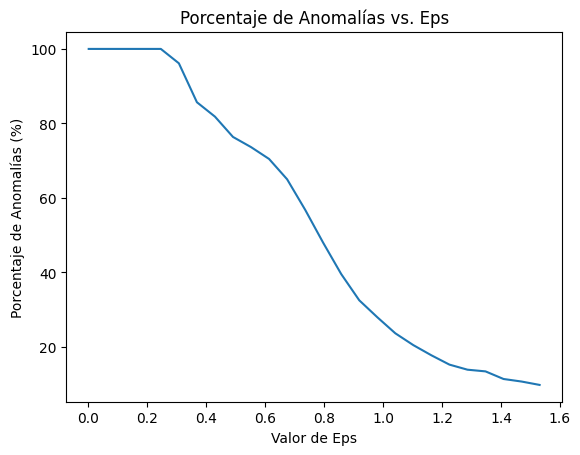

Valor de Eps donde el porcentaje de anomalías cae por debajo del 10%: 1.5311020408163265


In [278]:

# Definir el número de características (features) del conjunto de datos
n_features = df.shape[1]

# Establecer el rango de valores de eps
eps_values = np.linspace(0.001, 3, 50)

# Establecer el valor de min_samples como el doble de las características
min_samples = 2 * n_features

# Para guardar los resultados
anomalies = []

# Iterar sobre los valores de eps
for eps in eps_values:
    # Inicializar el modelo DBSCAN con los valores de eps y min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    # Ajustar el modelo a los datos
    labels = dbscan.fit_predict(df)
    # Calcular el porcentaje de anomalías (puntos etiquetados como -1)
    n_anomalies = np.sum(labels == -1)
    anomaly_percentage = n_anomalies / len(df) * 100
    anomalies.append(anomaly_percentage)

    # Si el porcentaje de anomalías es menor al 10%, parar la iteración
    if anomaly_percentage < 10:
        break

# Visualización del porcentaje de anomalías para cada valor de eps
plt.plot(eps_values[:len(anomalies)], anomalies)
plt.xlabel('Valor de Eps')
plt.ylabel('Porcentaje de Anomalías (%)')
plt.title('Porcentaje de Anomalías vs. Eps')
plt.show()

# Imprimir el valor de eps donde el porcentaje de anomalías cae por debajo del 10%
print(f'Valor de Eps donde el porcentaje de anomalías cae por debajo del 10%: {eps_values[len(anomalies)-1]}')

### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

In [279]:
dbscan = DBSCAN(eps=1.53, min_samples=min_samples)
labels = dbscan.fit_predict(df)

### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)

   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  Cluster_Label  
0   -0.066339              0  
1    0.089151              0  
2    2.243293              0  
3    0.093411              0  
4    1.299347              0  


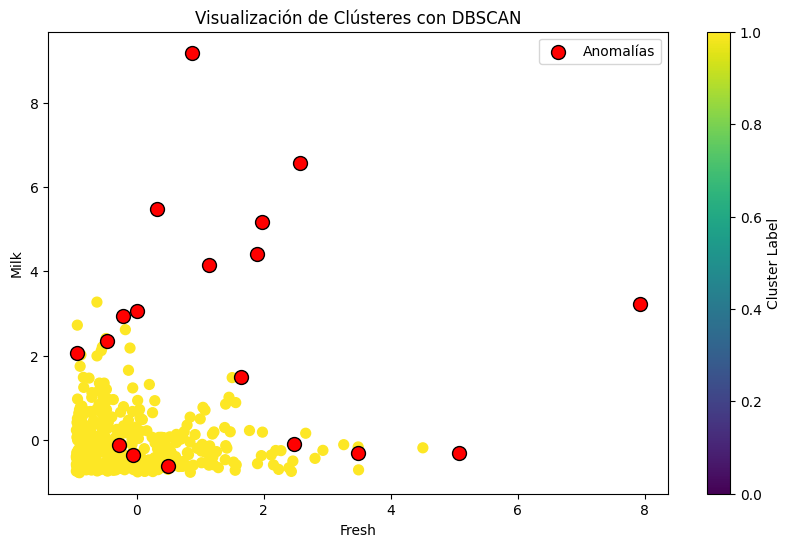

In [282]:

# Definir las características numéricas para DBSCAN (las columnas con datos continuos)
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Establecer el valor de min_samples como el doble del número de características
min_samples = 2 * features.shape[1]

# Usar un valor de eps = 2 (puedes experimentar con otros valores si es necesario)
eps = 2

# Inicializar DBSCAN y ajustar el modelo
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['Cluster_Label'] = dbscan.fit_predict(features)

# Visualizar los primeros registros del DataFrame con las etiquetas
print(df.head())

# Visualizar los resultados de DBSCAN en un gráfico de dispersión (usaremos las dos primeras características)
plt.figure(figsize=(10, 6))

# Los puntos de clúster son etiquetados con un color diferente según el valor de Cluster_Label
plt.scatter(df['Fresh'], df['Milk'], c=df['Cluster_Label'], cmap='viridis', s=50)

# Resaltar las anomalías (puntos etiquetados como -1)
plt.scatter(df['Fresh'][df['Cluster_Label'] == -1], 
            df['Milk'][df['Cluster_Label'] == -1], 
            color='red', label='Anomalías', s=100, edgecolors='black')

# Etiquetas y título
plt.title('Visualización de Clústeres con DBSCAN')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.colorbar(label='Cluster Label')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
